<a href="https://colab.research.google.com/github/Rajeeb321123/Machine-learning-Journey/blob/master/22_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [90]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [91]:
tf.__version__

'2.15.0'

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import zipfile

# Unzip the download file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [94]:
!ls dataset

test_set  training_set


In [95]:
!ls dataset/training_set/

cats  dogs


In [96]:
!ls dataset/training_set/dogs

dog.1000.jpg  dog.1516.jpg  dog.2030.jpg  dog.2546.jpg	dog.3060.jpg  dog.3576.jpg  dog.48.jpg
dog.1001.jpg  dog.1517.jpg  dog.2031.jpg  dog.2547.jpg	dog.3061.jpg  dog.3577.jpg  dog.490.jpg
dog.1002.jpg  dog.1518.jpg  dog.2032.jpg  dog.2548.jpg	dog.3062.jpg  dog.3578.jpg  dog.491.jpg
dog.1003.jpg  dog.1519.jpg  dog.2033.jpg  dog.2549.jpg	dog.3063.jpg  dog.3579.jpg  dog.492.jpg
dog.1004.jpg  dog.151.jpg   dog.2034.jpg  dog.254.jpg	dog.3064.jpg  dog.357.jpg   dog.493.jpg
dog.1005.jpg  dog.1520.jpg  dog.2035.jpg  dog.2550.jpg	dog.3065.jpg  dog.3580.jpg  dog.494.jpg
dog.1006.jpg  dog.1521.jpg  dog.2036.jpg  dog.2551.jpg	dog.3066.jpg  dog.3581.jpg  dog.495.jpg
dog.1007.jpg  dog.1522.jpg  dog.2037.jpg  dog.2552.jpg	dog.3067.jpg  dog.3582.jpg  dog.496.jpg
dog.1008.jpg  dog.1523.jpg  dog.2038.jpg  dog.2553.jpg	dog.3068.jpg  dog.3583.jpg  dog.497.jpg
dog.1009.jpg  dog.1524.jpg  dog.2039.jpg  dog.2554.jpg	dog.3069.jpg  dog.3584.jpg  dog.498.jpg
dog.100.jpg   dog.1525.jpg  dog.203.jpg   dog.2555.j

In [97]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("dataset"):
  print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in'{dirpath}'.")

There are 2 directoreis and 1 images in'dataset'.
There are 2 directoreis and 1 images in'dataset/test_set'.
There are 0 directoreis and 1001 images in'dataset/test_set/dogs'.
There are 0 directoreis and 1001 images in'dataset/test_set/cats'.
There are 2 directoreis and 1 images in'dataset/training_set'.
There are 0 directoreis and 4001 images in'dataset/training_set/dogs'.
There are 0 directoreis and 4001 images in'dataset/training_set/cats'.


In [98]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("dataset/training_set")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from subdirectories
print(class_names)

['.DS_Store' 'cats' 'dogs']


In [99]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# to select image randomly image
def view_random_image(target_dir, target_class): #target_dir in directory, target_class is either steak or pizza here
  # Setup the target directory (we'll view iamges from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder  + "/" + random_image[0]) # we random_image in list format so, we change into string path format to read
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") # show the shape of the image

  return img # why we return img because when after read in below it turns into a big array and consider into tensor

['dog.870.jpg']
Image shape:(333, 410, 3)


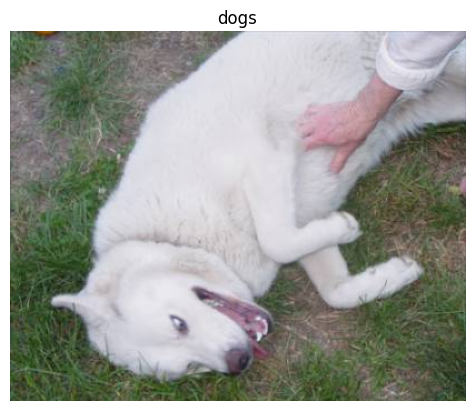

In [100]:
# View a random image from the training dataset
img = view_random_image(target_dir="dataset/training_set/",
                        target_class="dogs")

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [101]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, # feature scaling ( 0 to 1)
    # for overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
training_set= train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary') # binary classification dog or cat
len(training_set)

Found 8000 images belonging to 2 classes.


250

### Preprocessing the Test set

In [102]:
test_datagen = ImageDataGenerator(rescale=1./255) # we dont other in test , just feature scale only

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')
len(test_set)

Found 2000 images belonging to 2 classes.


63

## Part 2 - Building the CNN

### Initialising the CNN

In [103]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [104]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, # 32 unique fitlers
                               kernel_size=3, # 3 X 3 fitlers size or Feature Map
                               activation = 'relu',
                               input_shape=[64, 64, 3] # 3 for RGB color
                               ))

### Step 2 - Pooling

In [105]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, # 2 X 2 pool
                                  strides = 2
                                  ))

### Adding a second convolutional layer

In [106]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, # # fiters is the number of sliding window going across the input image
                               kernel_size=3, # 3 X 3 fitlers size or Feature Map
                               activation = 'relu',
                               input_shape=[64, 64, 3] # 3 for RGB color
                               ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, # 2 X 2 pool
                                  strides = 2
                                  ))

### Step 3 - Flattening

In [107]:
cnn.add(tf.keras.layers.Flatten()) # just 1 D vector which is input of ANN

In [108]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144

### Step 4 - Full Connection

In [109]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [110]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [111]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [112]:
cnn.fit(training_set,
        validation_data = test_set,
        epochs = 25
         )

Epoch 1/25
250/250 [==============================] - 23s 89ms/step - loss: 0.6662 - accuracy: 0.5904 - val_loss: 0.6040 - val_accuracy: 0.6785
Epoch 2/25
250/250 [==============================] - 21s 83ms/step - loss: 0.6010 - accuracy: 0.6754 - val_loss: 0.5574 - val_accuracy: 0.7290
Epoch 3/25
250/250 [==============================] - 22s 88ms/step - loss: 0.5663 - accuracy: 0.7067 - val_loss: 0.5678 - val_accuracy: 0.7260
Epoch 4/25
250/250 [==============================] - 21s 84ms/step - loss: 0.5358 - accuracy: 0.7325 - val_loss: 0.5256 - val_accuracy: 0.7460
Epoch 5/25
250/250 [==============================] - 22s 88ms/step - loss: 0.5213 - accuracy: 0.7330 - val_loss: 0.4882 - val_accuracy: 0.7575
Epoch 6/25
250/250 [==============================] - 21s 83ms/step - loss: 0.4937 - accuracy: 0.7630 - val_loss: 0.4975 - val_accuracy: 0.7465
Epoch 7/25
250/250 [==============================] - 22s 89ms/step - loss: 0.4812 - accuracy: 0.7684 - val_loss: 0.5055 - val_accuracy:

In [115]:
cnn.evaluate(test_set)

63/63 [==============================] - 3s 52ms/step - loss: 0.5572 - accuracy: 0.7970


[0.5571699738502502, 0.796999990940094]

## Part 4 - Making a single prediction

In [118]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/dataset/test_set/dogs/dog.4001.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image) # image to numpy array
# adding dim to image because we trained our model in batches 32 which means it has extra dimension at first
test_image = np.expand_dims(test_image, axis = 0)  # axis = 0 means as first dimension
result = cnn.predict(test_image)

# to get info that 1 = dog and 0 = cat
print(training_set.class_indices)
# result also has batch dimension at first so, result[0][0] first [0] for batch and [0] for real result
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 207ms/step
{'cats': 0, 'dogs': 1}


In [119]:
print(prediction) # right answer

dog
